In [1]:
'''
To calculate net heat flux at the surface
"qnet = rss + rls - hfls - hfss"
"rss = rsds - rsus\n"
"rls = rlds - rlus\n"
'''
import xarray as xr # requires >= 0.15.1
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.getcwd()

%cd /g/data/p66/ars599/work_eae

/g/data/p66/ars599/work_eae


In [5]:
# --- read data ---
idir = './'
h1Name = 'hfls_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'
h2Name = 'hfss_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'
r1Name = 'rsus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'
r2Name = 'rsds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'
r3Name = 'rlus_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'
r4Name = 'rlds_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912.nc'

# Open a netCDF data file using xarray default engine and load the data into xarrays
h1_in = xr.open_dataset(idir+h1Name)
h2_in = xr.open_dataset(idir+h2Name)
r1_in = xr.open_dataset(idir+r1Name)
r2_in = xr.open_dataset(idir+r2Name)
r3_in = xr.open_dataset(idir+r3Name)
r4_in = xr.open_dataset(idir+r4Name)

# Use date as the dimension rather than time
year_start = 2000
year_end = 2009

h1_ds = h1_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 145
h2_ds = h2_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 145
r1_ds = r1_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 145
r2_ds = r2_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 145
r3_ds = r3_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 144
r4_ds = r4_in.sel(time=slice(f'{year_start:04d}', f'{year_end:04d}')) # 192 x 144


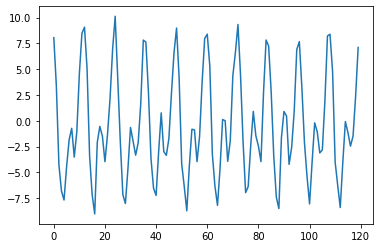

In [29]:
hfls = h1_ds['hfls'].mean(['lat','lon'])
hfss = h2_ds['hfss'].mean(['lat','lon'])
rsus = r1_ds['rsus'].mean(['lat','lon'])
rsds = r2_ds['rsds'].mean(['lat','lon'])
rlus = r3_ds['rlus'].mean(['lat','lon'])
rlds = r4_ds['rlds'].mean(['lat','lon'])
rss = rsds - rsus
rls = rlds - rlus
qnet_r2 = rss + rls - hfls - hfss
plt.plot(qnet_r2)

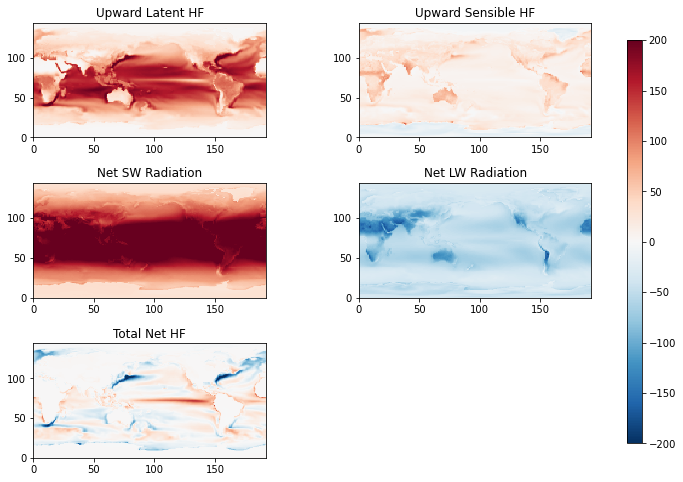

In [28]:
hfls_2D = h1_ds['hfls']
hfss_2D = h2_ds['hfss']
rsus_2D = r1_ds['rsus']
rsds_2D = r2_ds['rsds']
rlus_2D = r3_ds['rlus']
rlds_2D = r4_ds['rlds']

rss_2D = rsds_2D - rsus_2D
rls_2D = rlds_2D - rlus_2D

qnet_2D = rss_2D + rls_2D - hfls_2D - hfss_2D

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_panel(ax, data, title):
    im = ax.pcolormesh(data.mean('time'), cmap='RdBu_r', vmin=-200, vmax=200)
    ax.set_title(title)
    return im

# Define the variables and titles
variables = [hfls_2D, hfss_2D, rss_2D, rls_2D, qnet_2D]
titles = ['Upward Latent HF', 'Upward Sensible HF', 'Net SW Radiation', 'Net LW Radiation', 'Total Net HF']

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 2, wspace=0.4, hspace=0.4)

# Create subplots for the first four variables
for i in range(4):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    im = plot_panel(ax, variables[i], titles[i])

# Create a central subplot for the fifth variable
ax_center = fig.add_subplot(gs[2, 0])
im_center = plot_panel(ax_center, variables[4], titles[4])

# Add colorbar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im_center, cax=cbar_ax)

plt.show()